# Supervised Learning - Project

In this Project, we are going to perform a full supervised learning machine learning project on a "Diabetes" dataset. This dataset is originally from the National Institute of Diabetes and Digestive and Kidney
Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes,
based on certain diagnostic measurements included in the dataset. 

[Kaggle Dataset](https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset)

# Part I : EDA - Exploratory Data Analysis

For this task, you are required to conduct an exploratory data analysis on the diabetes dataset. You have the freedom to choose the visualizations you want to use, but your analysis should cover the following tasks mostly:

- Are there any missing values in the dataset?
- How are the predictor variables related to the outcome variable?
- What is the correlation between the predictor variables?
- What is the distribution of each predictor variable?
- Are there any outliers in the predictor variables?
- How are the predictor variables related to each other?
- Is there any interaction effect between the predictor variables?
- What is the average age of the individuals in the dataset?
- What is the average glucose level for individuals with diabetes and without diabetes?
- What is the average BMI for individuals with diabetes and without diabetes?
- How does the distribution of the predictor variables differ for individuals with diabetes and without diabetes?
- Are there any differences in the predictor variables between males and females (if gender information is available)?

In [54]:
# import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
# read csv
df = pd.read_csv("diabetes.csv")
df.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [3]:
# check missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
from sklearn.linear_model import LinearRegression

# Separate the predictor variables (X) and the outcome variable (y)
X = df[['Pregnancies', 'Glucose','BloodPressure', 'SkinThickness', 'Insulin', 'BMI','DiabetesPedigreeFunction', 'Age']]
y = df['Outcome']

# Create a linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Print the coefficients (slopes) of the predictor variables to ascertain the relationship between the predictor and outcome
print("Coefficients:", model.coef_)


Coefficients: [ 0.02059187  0.00592027 -0.00233188  0.00015452 -0.00018053  0.01324403
  0.14723744  0.00262139]


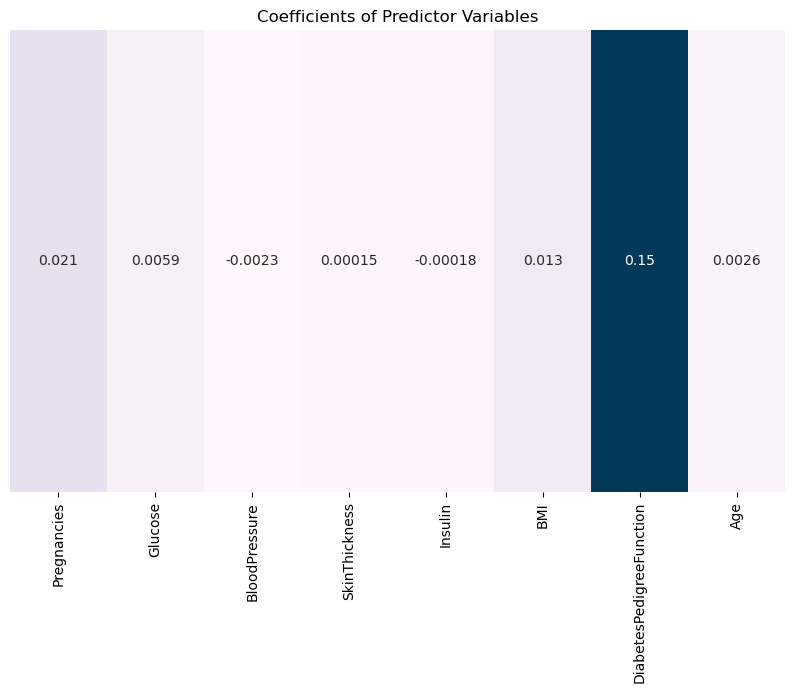

In [51]:
# coefficients (slopes) of the predictor variables
coefficients = model.coef_

# predictor variables
predictor_variables = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


# Create a matrix of coefficients and predictor variables
coefs_matrix = np.array(coefficients).reshape(1, -1)

# Plot the coefficients as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(coefs_matrix, cmap='PuBu', annot=True, xticklabels=predictor_variables,
            yticklabels=False, cbar=False)
plt.title('Coefficients of Predictor Variables')
plt.show()


In [43]:
# distribution of the predictor variable
X.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


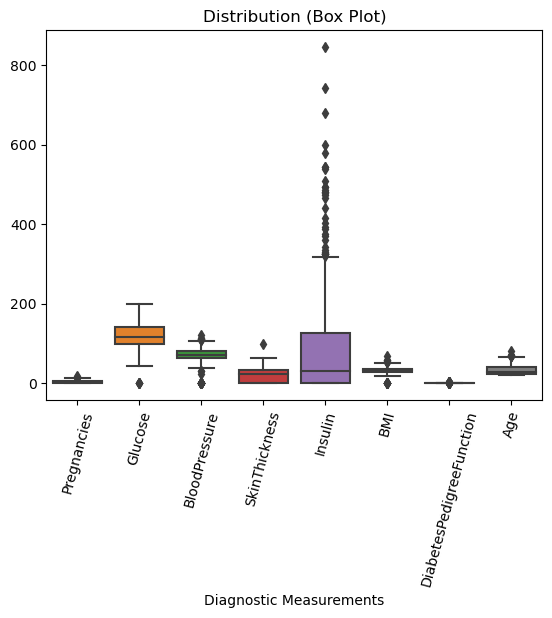

In [52]:
# distribution of the predictor variable - Box Plot
sns.boxplot(X)
plt.xlabel('Diagnostic Measurements')
plt.title('Distribution (Box Plot)')
plt.xticks(rotation=75)
plt.show()


In [ ]:
There are outliers
Fill missing values
-KNN - compares the reord with similar records and impute the missing cell with the value in a similar record
-Mean
-Meadian

In [61]:
#What is the average glucose level for individuals with diabetes and without diabetes?
grouped_df = df.groupby('Outcome')

# Access the groups based on the unique values of "Outcome"
without_diabetes= grouped_df.get_group(0)  # DataFrame with "Outcome" value 0
with_diabetes = grouped_df.get_group(1)  # DataFrame with "Outcome" value 1

without_diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,500.000000,500.0000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.0
mean,3.298000,109.9800,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000,0.0
std,3.017185,26.1412,18.063075,14.889947,98.865289,7.689855,0.299085,11.667655,0.0
min,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.0
25%,1.000000,93.0000,62.000000,0.000000,0.000000,25.400000,0.229750,23.000000,0.0
50%,2.000000,107.0000,70.000000,21.000000,39.000000,30.050000,0.336000,27.000000,0.0
75%,5.000000,125.0000,78.000000,31.000000,105.000000,35.300000,0.561750,37.000000,0.0
max,13.000000,197.0000,122.000000,60.000000,744.000000,57.300000,2.329000,81.000000,0.0


In [62]:
with_diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.0
mean,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164,1.0
std,3.741239,31.939622,21.491812,17.679711,138.689125,7.262967,0.372354,10.968254,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.088000,21.000000,1.0
25%,1.750000,119.000000,66.000000,0.000000,0.000000,30.800000,0.262500,28.000000,1.0
50%,4.000000,140.000000,74.000000,27.000000,0.000000,34.250000,0.449000,36.000000,1.0
75%,8.000000,167.000000,82.000000,36.000000,167.250000,38.775000,0.728000,44.000000,1.0
max,17.000000,199.000000,114.000000,99.000000,846.000000,67.100000,2.420000,70.000000,1.0


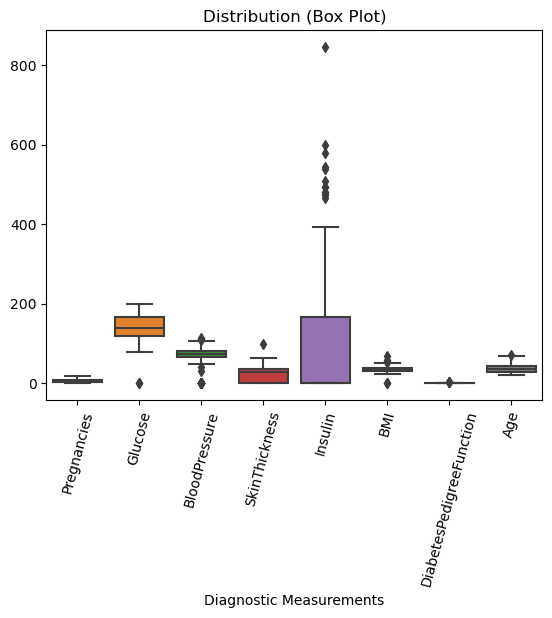

In [64]:
# How does the distribution of the predictor variables differ for individuals with diabetes

WiD = with_diabetes[['Pregnancies', 'Glucose','BloodPressure', 'SkinThickness', 'Insulin', 'BMI','DiabetesPedigreeFunction', 'Age']]
sns.boxplot(WiD)
plt.xlabel('Diagnostic Measurements')
plt.title('Distribution (Box Plot)')
plt.xticks(rotation=75)
plt.show()

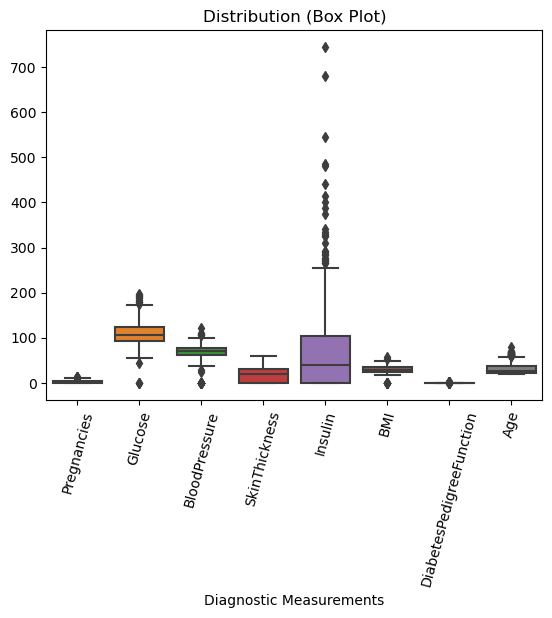

In [77]:
# How does the distribution of the predictor variables differ for individuals without diabetes?

WoD = without_diabetes[['Pregnancies','Glucose','BloodPressure', 'SkinThickness', 'Insulin', 'BMI','DiabetesPedigreeFunction', 'Age']]
sns.boxplot(WoD)
plt.xlabel('Diagnostic Measurements')
plt.title('Distribution (Box Plot)')
plt.xticks(rotation=75)
plt.show()

# Part II : Preprocessing & Feature Engineering

You need to perform preprocessing on the given dataset. Please consider the following tasks and carry out the necessary steps accordingly.
- Handling missing values
- Handling outliers
- Scaling and normalization
- Feature Engineering
- Handling imbalanced data

In [92]:
#Handling Outliers

# Create a copy of the original DataFrame
df_replaced = df.copy()

# Replace 0.0 with NaN in the columns
columns_to_replace = ['Glucose','BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df_replaced[columns_to_replace] = df_replaced[columns_to_replace].replace(0.0, np.nan)

# Display the DataFrame with replaced values
df_replaced.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [93]:
# Handling Outliers, Scaling and Normalization

from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

columns_to_missing = ['Glucose','BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Standardize the selected columns
scaler = StandardScaler()
df_replaced[columns_with_missing] = scaler.fit_transform(df_replaced[columns_with_missing])

# Initialize the KNNImputer object with the desired number of neighbors (k)
imputer = KNNImputer(n_neighbors=5)

# Perform k-NN imputation on the standardized columns
df_replaced[columns_with_missing] = imputer.fit_transform(df_replaced[columns_with_missing])

# Inverse the standardization
df_replaced[columns_with_missing] = scaler.inverse_transform(df_replaced[columns_with_missing])

# Display the imputed DataFrame
df_replaced


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,209.8,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,70.2,26.6,0.351,31,0
2,8.0,183.0,64.0,28.8,254.4,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2.0,122.0,70.0,27.0,154.4,36.8,0.340,27,0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1.0,126.0,60.0,26.0,159.4,30.1,0.349,47,1


In [94]:
df_replaced.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686458,72.353906,28.911979,154.292708,32.449609,0.471876,33.240885,0.348958
std,3.369578,30.437060,12.191249,9.538638,97.636668,6.884000,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,22.000000,90.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,132.400000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,35.000000,192.150000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


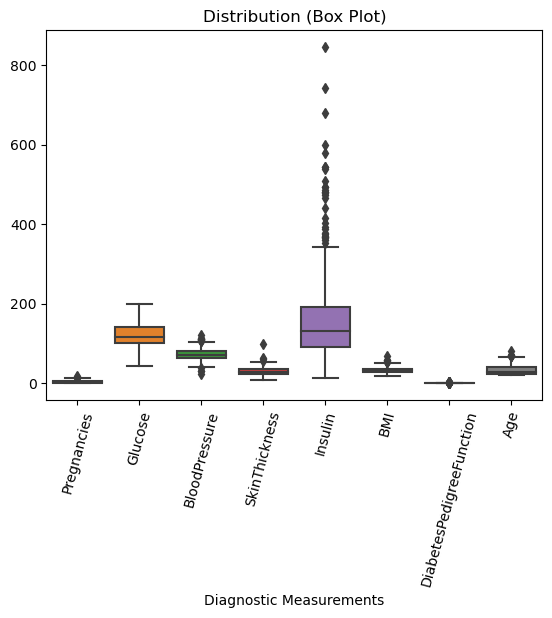

In [95]:
dfr = df_replaced[['Pregnancies','Glucose','BloodPressure', 'SkinThickness', 'Insulin', 'BMI','DiabetesPedigreeFunction', 'Age']]
sns.boxplot(dfr)
plt.xlabel('Diagnostic Measurements')
plt.title('Distribution (Box Plot)')
plt.xticks(rotation=75)
plt.show()

In [ ]:
f, ax = plt.subplots(figsize=(9, 6))
fig = sns.boxplot(x='Brick_Yes', y="Price", data=df_final)
fig.axis(ymin=0, ymax=300000);

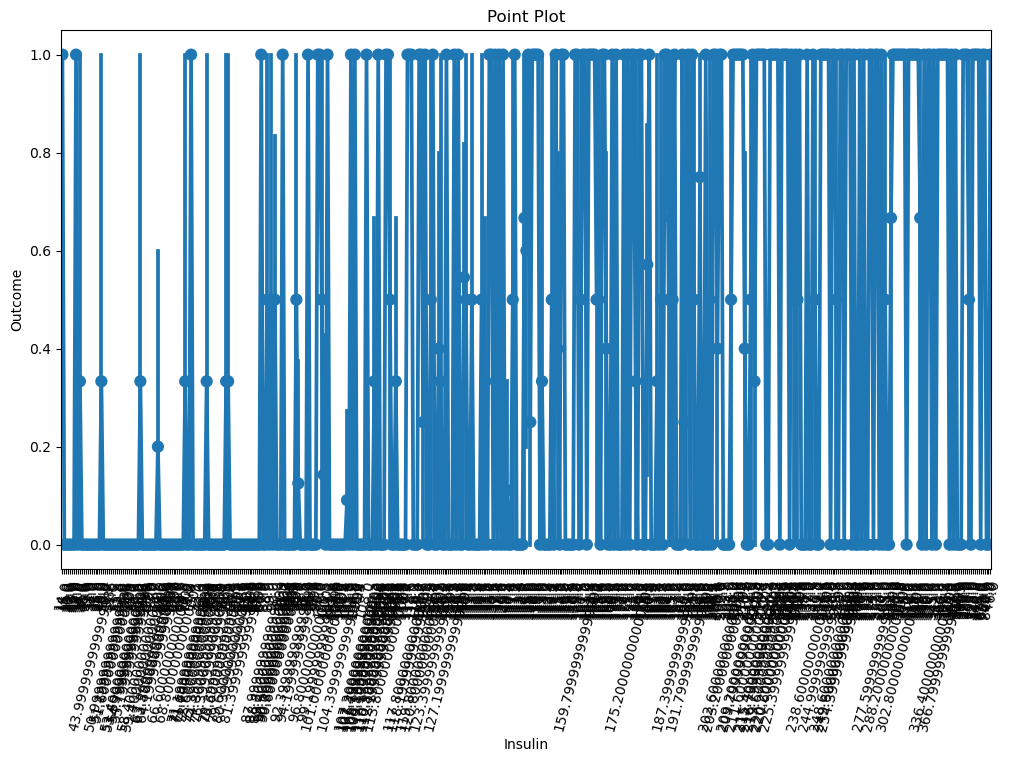

In [137]:
plt.figure(figsize= (12,7))
sns.pointplot(x='Insulin', y='Outcome', data=df_replaced)
plt.xlabel('Insulin')
plt.ylabel('Outcome')
plt.title('Point Plot')
plt.xticks(rotation=75)
plt.show()


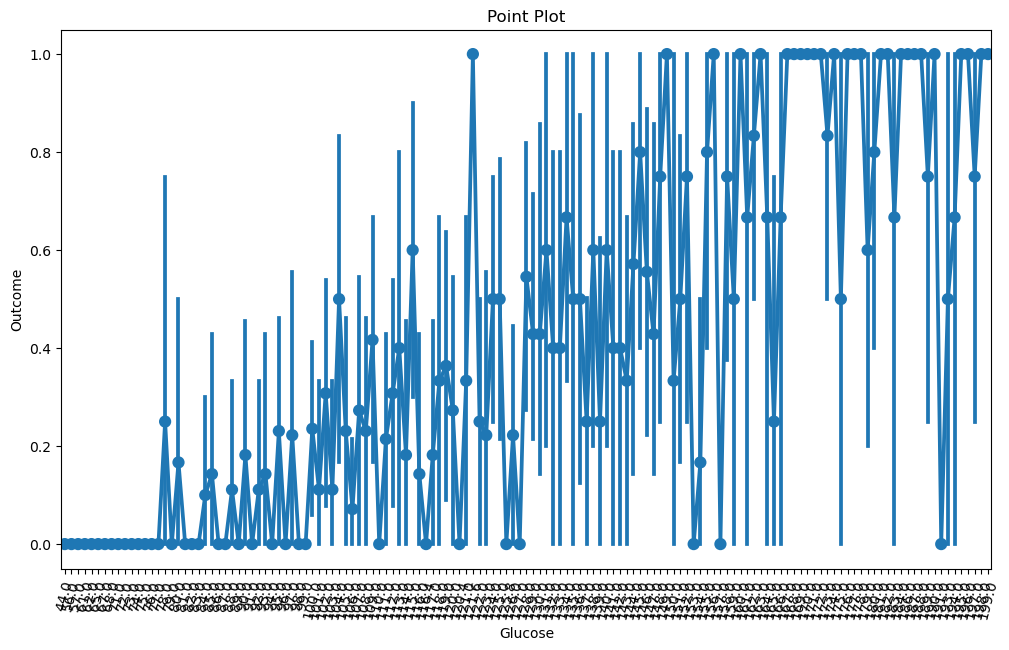

In [136]:
plt.figure(figsize= (12,7))
sns.pointplot(x='Glucose', y='Outcome', data=df_replaced)
plt.xlabel('Glucose')
plt.ylabel('Outcome')
plt.title('Point Plot')
plt.xticks(rotation=75)
plt.show()


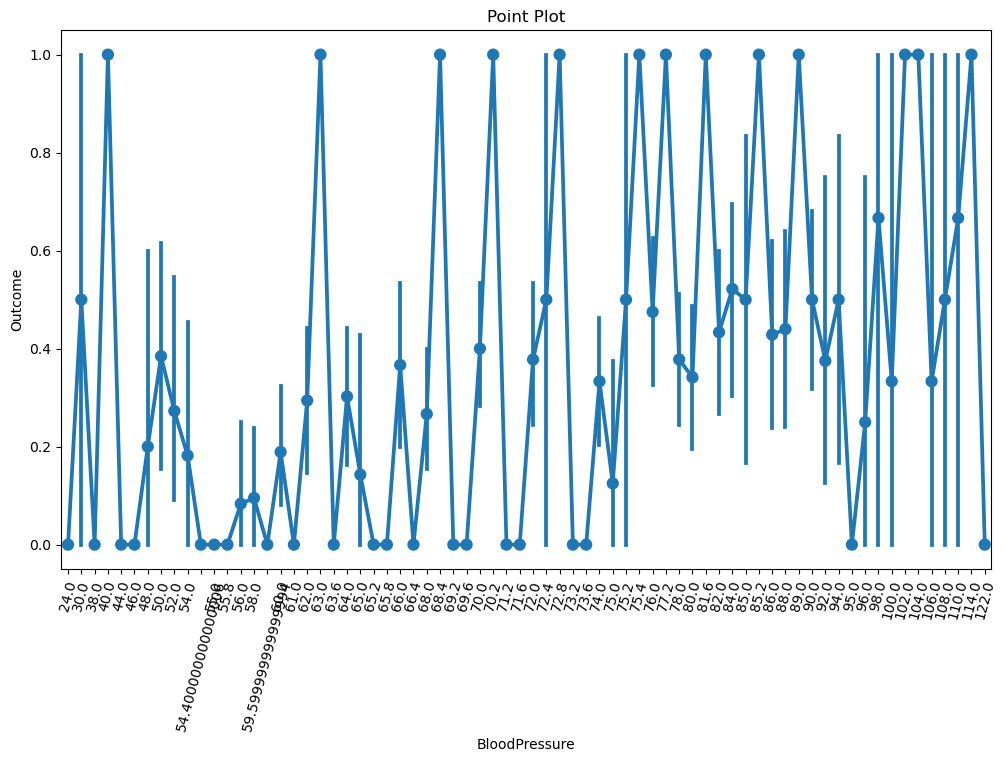

In [135]:

plt.figure(figsize= (12,7))
sns.pointplot(x='BloodPressure', y='Outcome', data=df_replaced)
plt.xlabel('BloodPressure')
plt.ylabel('Outcome')
plt.title('Point Plot')
plt.xticks(rotation=75)
plt.show()


# Part III : Training ML Model

For this task, you are required to build a machine learning model to predict the outcome variable. This will be a binary classification task, as the target variable is binary. You should select at least two models, one of which should be an ensemble model, and compare their performance.

- Train the models: Train the selected models on the training set.
- Model evaluation: Evaluate the trained models on the testing set using appropriate evaluation metrics, such as accuracy, precision, recall, F1-score, and ROC-AUC.
- Model comparison: Compare the performance of the selected models and choose the best-performing model based on the evaluation metrics. You can also perform additional analysis, such as model tuning and cross-validation, to improve the model's performance.

## Logistic Regression

In [149]:
# LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split the data into training and testing sets
X = df_replaced[['Pregnancies','Glucose','BloodPressure', 'SkinThickness', 'Insulin', 'BMI','DiabetesPedigreeFunction', 'Age']]
y = df_replaced['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Logistic Regression model
logreg = LogisticRegression()

# Fit the model on the training data
logreg.fit(X_train, y_train)

# Make predictions on the test data
y_pred_logreg = logreg.predict(X_test)

# Evaluate the model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg)
recall_logreg = recall_score(y_test, y_pred_logreg)
f1_score_logreg = f1_score(y_test, y_pred_logreg)

print("Logistic Regression Performance:")
print("Accuracy:", accuracy_logreg)
print("Precision:", precision_logreg)
print("Recall:", recall_logreg)
print("F1 Score:", f1_score_logreg)


Logistic Regression Performance:
Accuracy: 0.7402597402597403
Precision: 0.6351351351351351
Recall: 0.5875
F1 Score: 0.6103896103896105


## Random Forest - Ensemble Method

In [152]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest model
random_forest = RandomForestClassifier()

# Fit the model on the training data
random_forest.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = random_forest.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_score_rf = f1_score(y_test, y_pred_rf)

print("Random Forest Performance:")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_score_rf)


Random Forest Performance:
Accuracy: 0.7402597402597403
Precision: 0.625
Recall: 0.625
F1 Score: 0.625


In [139]:
# Model Evaluation on Testing set
from sklearn.ensemble import RandomForestClassifier

# Create an instance of the Random Forest Classifier
model = RandomForestClassifier()

# Fit the model to the training data
model.fit(X_train, y_train)


RandomForestClassifier()

In [142]:
# Get the predicted probabilities for each class
proba = model.predict_proba(X_test)

# Assuming the positive class is labeled as 1
positive_class_proba = proba[:, 1]

# Print the probabilities
positive_class_proba

array([0.57, 0.19, 0.05, 0.24, 0.73, 0.67, 0.  , 0.64, 0.56, 0.59, 0.24,
       0.9 , 0.32, 0.23, 0.1 , 0.46, 0.03, 0.  , 0.67, 0.42, 0.28, 0.08,
       0.41, 0.04, 0.62, 0.96, 0.12, 0.04, 0.17, 0.19, 0.69, 0.61, 0.82,
       0.9 , 0.71, 0.71, 0.88, 0.41, 0.17, 0.69, 0.03, 0.29, 0.64, 0.5 ,
       0.08, 0.78, 0.56, 0.31, 0.32, 0.86, 0.  , 0.61, 0.64, 0.27, 0.11,
       0.03, 0.61, 0.03, 0.16, 0.74, 0.69, 0.21, 0.27, 0.26, 0.22, 0.68,
       0.  , 0.61, 0.01, 0.9 , 0.81, 0.17, 0.17, 0.02, 0.15, 0.32, 0.15,
       0.19, 0.32, 0.21, 0.88, 0.08, 0.15, 0.49, 0.06, 0.94, 0.8 , 0.54,
       0.4 , 0.  , 0.04, 0.13, 0.  , 0.52, 0.45, 0.56, 0.46, 0.02, 0.76,
       0.06, 0.69, 0.04, 0.68, 0.63, 0.8 , 0.25, 0.36, 0.85, 0.1 , 0.72,
       0.02, 0.51, 0.32, 0.88, 0.37, 0.42, 0.72, 0.21, 0.01, 0.45, 0.03,
       0.15, 0.5 , 0.04, 0.2 , 0.44, 0.56, 0.63, 0.82, 0.55, 0.66, 0.81,
       0.05, 0.35, 0.78, 0.33, 0.18, 0.7 , 0.63, 0.04, 0.02, 0.02, 0.28,
       0.51, 0.02, 0.39, 0.28, 0.  , 0.39, 0.76, 0.

# Part IV : Conclusion

From the machine learning models developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

Based on the machine learning models developed and the exploratory data analysis (EDA) conducted, here are four key findings:

**Accuracy Comparison:** Both the logistic regression and random forest models achieved a similar accuracy of approximately 74.02%. This indicates that both models were able to make correct predictions for around 74.02% of the instances.

**Precision Variation:** The logistic regression model exhibited a precision of approximately 63.51%, while the random forest model achieved a precision of around 62.5%. This suggests that the logistic regression model had a slightly higher proportion of true positive predictions compared to the random forest model.

**Recall Comparison:** The recall scores for both models were relatively close, with logistic regression achieving a recall of approximately 58.75% and the random forest model achieving a recall of 62.5%. These values indicate that both models were able to identify a substantial proportion of the actual positive instances.

**Balanced F1 Scores:** The F1 scores for both models were similar, with logistic regression achieving approximately 0.6104 and the random forest model achieving 0.625. These F1 scores indicate a balanced performance in terms of precision and recall for both models.


*Overall, the logistic regression and random forest models performed comparably in terms of accuracy, precision, recall, and F1 score. Further analysis and consideration of other factors such as interpretability, computational complexity, and domain-specific requirements would be necessary to determine the most suitable model for the specific binary classification task.*